## Base de dados cifar10
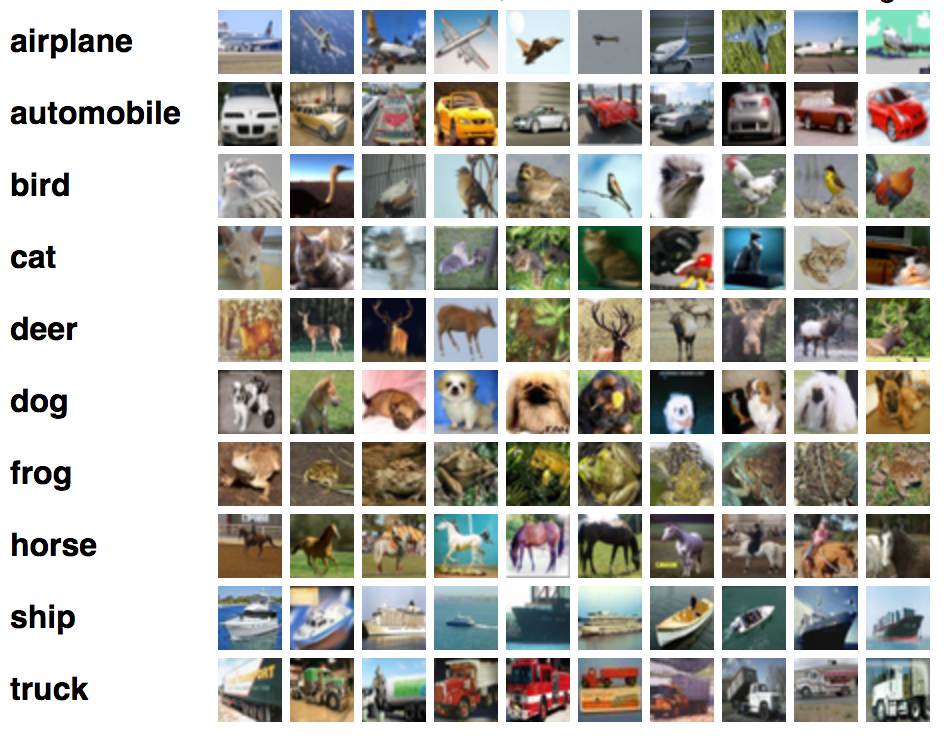

###### Importações

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.datasets import cifar10

###### Base de dados e conversões

In [2]:
# Obs: Não utilizaremos a classe pois apenas queremos comparar as imagens codificadas com as reconstruidas
(previsores_treinamento, _), (previsores_teste, _) = cifar10.load_data()

In [3]:
# Conversões (para aceleramento do processamento)
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

###### Redimensionamento das imagens
Como essa base de dados apresenta imagens coloridas temos 3 canais RGB. As dimensão dessas imagens é 32 x 32, portanto teremos um total de 3072 características (32 x 32 x 3 canais)

In [4]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))

In [5]:
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

### Autoencoder para dimensionamento de imagens
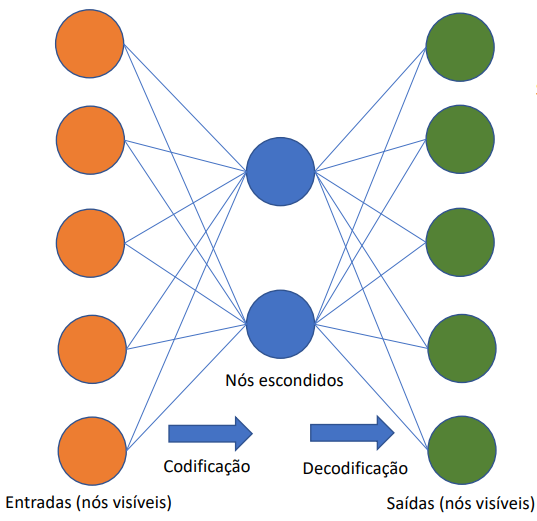

Parâmetros da rede neural artificial:

    Dense - Todos os neurônios conectados
    units - Quantidade de neurônios (3072 / 2 = 1536) e (1536 / 2 = 768)
    activation - Função de ativação que será inserida ('relu')
    input_dim - número total de entradas (32 x 32 x 3 canais = 3072 pixels)
    
Obs: Para encontrarmos as dimensões foi feito uma divisão dos valores pela metade, assim a dimensão mínima que será usada será 768 pixels, assim, de 3072 pixels reduziremos para 768 pixels.

    Estrutura do encoder: 3072 - 1536 - 768 - 1536 - 3072

In [6]:
# Codificação
autoencoder = Sequential()
# Camada de entrada
autoencoder.add(Dense(units = 1536, activation = 'relu', input_dim = 3072))
# Camada de saida
autoencoder.add(Dense(units = 768, activation='relu'))

In [7]:
# Decodificação
# É realizado o processo inverso (768 - 1536 - 3072)
autoencoder.add(Dense(units = 1536, activation='relu'))
autoencoder.add(Dense(units = 3072, activation='sigmoid'))

###### Compilação e treinamento do Autoenconder

Parâmetros do otimizador:

    optimizer - descida do gradiente e descida do gradiente estocástica (adam é uma otimização do estocástica)
    loss - Função de perda (binary_crossentropy pois só há uma saída)
    metrics - Métrica de avaliação (obs - pode ser colocado mais de um)
    
Parâmetros do treinamento:

    X - Atributos previsores
    y - Atributos da classe (porém nós devemos comparar por si mesmo já que os dados apenas são redimensionados)
    epochs - número das épocas
    batch_size - número de batchs
    validation_data - dados de validação (mesma coisa, devemos comparar 'eles por eles')

In [8]:
# Compilação
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Treinamento - (Coloquei apenas 10 epocas pelo tempo de processamento)
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs=10, batch_size=256, validation_data=(previsores_teste, previsores_teste))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - ETA: 0s - loss: 0.6281 - accuracy: 0.0023WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000005A89D5A3A8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

###### Codificação e decodificação

In [9]:
dimensao_original = Input(shape=(3072,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]

In [10]:
encoder = Model(dimensao_original, camada_encoder2(camada_encoder1(dimensao_original)))
encoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 1536)              4720128   
_________________________________________________________________
dense_1 (Dense)              (None, 768)               1180416   
Total params: 5,900,544
Trainable params: 5,900,544
Non-trainable params: 0
_________________________________________________________________


In [11]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

###### Observação da imagem original, codificada e reconstruída

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

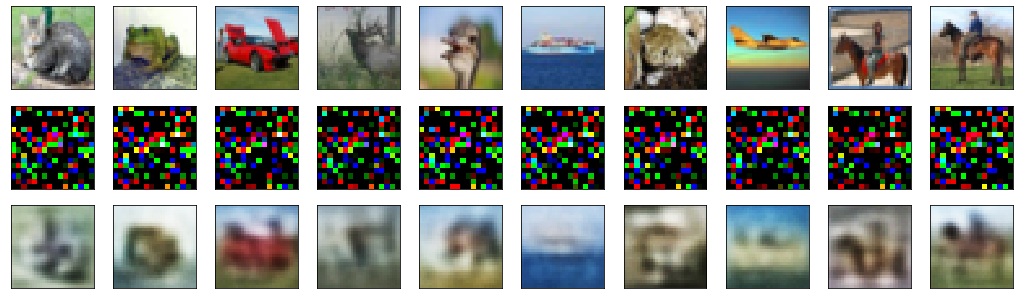

In [13]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size=numero_imagens)
plt.figure(figsize=(18, 18))
for i, indice_imagem in enumerate(imagens_teste):
    # Imagem original, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())
    
    # Imagem codificada, nas dimensões 16x16 com 3 canais
    # Se multiplicar os três valores teremos o valor mínimo que é 768 pixels
    eixo = plt.subplot(10, 10, numero_imagens + i + 1)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 16, 3))
    plt.xticks(())
    plt.yticks(())

    # Imagem decodificada, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(10, 10, 2 * numero_imagens + i + 1)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())
plt.show()

Com isso podemos observar que a imagem original e a imagem reconstruída ficaram bastantes borradas em relação a original, é claro que ficou dessa forma pois eu coloquei poucas épocas no treinamento do modelo e, por conta disto o modelo não ficou tão bom quanto eu esperava.